# PET BREED RECOGNITION: DATA ANALYSIS AND MACHINE LEARNING
## CETM46 - Data Science Product Development
### This Notebook file contains the Data Analysis and Machine Learning parts of the 2nd assessment of the course as required for the backend model creation for the product development.

The Project is credited to:
* Okeoma O. Ihunwo
* Student No.: 229154449
* Course: MSc Applied Data Science
* School of Computer Science
* University of Sunderland
**(2022/3 - Sunderland - ASUND)**

In [2]:
# Importing required libraries
import os
import glob
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pickle
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


# Data Exploration

### _Data Cleaning:_ Getting list of images (excluding some images that do not open)

In [3]:
# Getting the local directories of the dataset images and annotations
listPath = 'Oxford_dataset/annotations/list.txt'
petImgPath = 'Oxford_dataset/images'
annotPath = 'Oxford_dataset/annotations/trimaps'

# Assigning images that are not opening into a dictionary
error_files = {'Abyssinian_34.jpg', 'Egyptian_Mau_139.jpg', 'Egyptian_Mau_145.jpg', 'Egyptian_Mau_167.jpg', 'Egyptian_Mau_177.jpg', 'Egyptian_Mau_191.jpg'}

# Isolating images that are not opening
img_files = [i for i in os.listdir(petImgPath) if i.rsplit('.',1)[1] == 'jpg' and i not in error_files]

# Get the annotations out the path
annot_files = [i for i in os.listdir(annotPath) if i.rsplit('.',1)[1] == 'png']

# Displaying the useful and error files 
print(f'There are {str(len(img_files))} image files that are useful for analysis.')
print(f'There are {str(len(error_files))} image files that are error prone.')

There are 7384 image files that are useful for analysis.
There are 6 image files that are error prone.


### Getting information about the images from the `list.txt` file
Information is extracted into 2 dictionaries: `idInfo` and `breedInfo`

In [4]:
# getting info from 'list.txt' file
listInfo = open(listPath, 'r')

# Extract the breed name
breedName = lambda pic : pic.rsplit('_',1)[0].lower()

# Getting the species
speciesName = lambda num : 'cat' if num==1 else 'dog'

# Initializing dictionaries where data will be stored
idInfo = {}
breedInfo = {}

# The program Takes account of the names and ids of the breeds
for info in listInfo: # loop through every line in the 'list.txt' file

    # if it has an '#' in the begining then ignore it since it is used as comments
    if info[0] == '#':
        continue

    # Creating a list with the info in the row
    info = info.strip().split(' ')

    # Getting the species information, id, breed id and the name from the file for each row   
    species = speciesName(int(info[2]))
    id = int(info[1])
    breedid = int(info[3])
    breed = breedName(info[0]).lower()

    # Storing the information in 2 dictionaries (breedInfo and idInfo)    
    if breed not in breedInfo:
        breedInfo[breed] = {'breed' : breed, 'species' : species, 'globalid': id, 'breedid':breedid, 'count':0}
        idInfo[id] = breedInfo[breed]

# Getting the count of the number of images in the file
for i in [breedName(num) for num in img_files]:
    breedInfo[i]['count']+=1

# Printing the contents of idInfo dictionary
print(idInfo)


{1: {'breed': 'abyssinian', 'species': 'cat', 'globalid': 1, 'breedid': 1, 'count': 199}, 2: {'breed': 'american_bulldog', 'species': 'dog', 'globalid': 2, 'breedid': 1, 'count': 200}, 3: {'breed': 'american_pit_bull_terrier', 'species': 'dog', 'globalid': 3, 'breedid': 2, 'count': 200}, 4: {'breed': 'basset_hound', 'species': 'dog', 'globalid': 4, 'breedid': 3, 'count': 200}, 5: {'breed': 'beagle', 'species': 'dog', 'globalid': 5, 'breedid': 4, 'count': 200}, 6: {'breed': 'bengal', 'species': 'cat', 'globalid': 6, 'breedid': 2, 'count': 200}, 7: {'breed': 'birman', 'species': 'cat', 'globalid': 7, 'breedid': 3, 'count': 200}, 8: {'breed': 'bombay', 'species': 'cat', 'globalid': 8, 'breedid': 4, 'count': 200}, 9: {'breed': 'boxer', 'species': 'dog', 'globalid': 9, 'breedid': 5, 'count': 200}, 10: {'breed': 'british_shorthair', 'species': 'cat', 'globalid': 10, 'breedid': 5, 'count': 200}, 11: {'breed': 'chihuahua', 'species': 'dog', 'globalid': 11, 'breedid': 6, 'count': 200}, 12: {'br

### Display a bar chart showing the number of images per breed & counting images per species

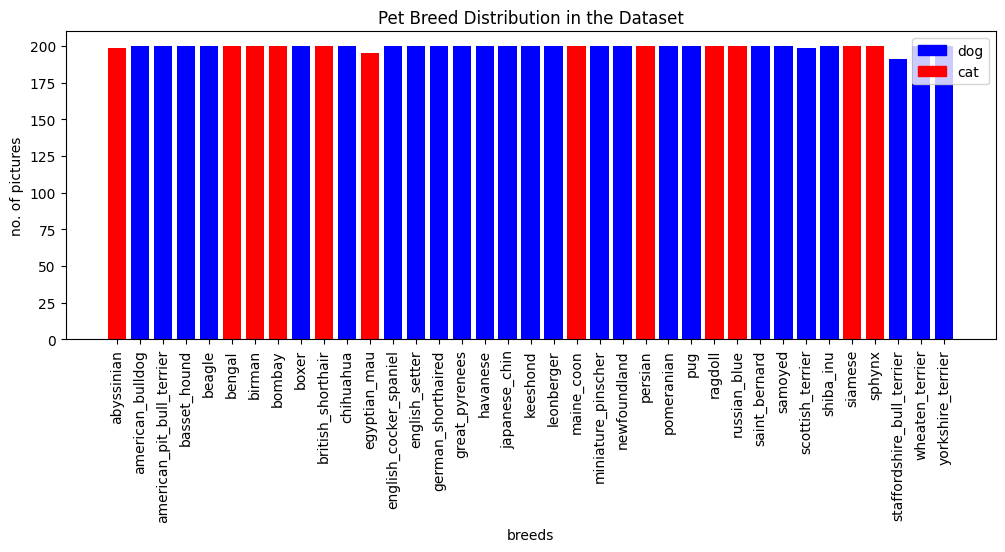

There are 4990 images of dogs, and 2394 of cats!


In [5]:
# fetching only the ids of the 37 classess of breeds
idList = list(idInfo.keys())

# Getting the label names of the 37 classess of pet breeds
xLabels = [idInfo[i]['breed'] for i in idList]

# Assigning the total number of each breed to idCounts
idCounts = [idInfo[id]['count'] for id in idList]

# labeling dogs with blue colour and cats with red colour:
petColours = [ 'blue' if idInfo[id]['species']=='dog' else 'red' for id in idList]

# Assigning the right colours to the pets into the dictionary 'legendCol'
legendCol = {'dog': 'blue', 'cat':'red'}

# Assigning the legend column keys (Cat, dogs) to labels 
labels = list(legendCol.keys())

# Creating an object for the chart information
handles = [plt.Rectangle((0,0),1,1, color=legendCol[label]) for label in legendCol]

# Setting the Bar chart plot parameters
fig, ax = plt.subplots( figsize= (12,4))
ax.bar(idList, idCounts, color=petColours)

# Setting ticks, axis X & Y labels and legend:
ax.set_xticks(idList)
ax.set_xticklabels(xLabels, rotation='vertical')
plt.legend(handles, labels)
plt.xlabel('breeds')
plt.ylabel('no. of pictures')
plt.title('Pet Breed Distribution in the Dataset')

# Show chart
plt.show()

# Get the count of dogs and cats
dogsCount = sum([ idInfo[id]['count'] for id in idList if idInfo[id]['species'] == 'dog' ])
catsCount = sum([ idInfo[id]['count'] for id in idList if idInfo[id]['species'] == 'cat' ])

# Printing the results showing total number of cats and dogs
print(f'There are {str(dogsCount)} images of dogs, and {str(catsCount)} of cats!')

### _Chart Interpretaion:_ From the bar chart above, we could see that the pet breed distribution are about the same number of 200 which is very suitable for training the machine learning model. However, since we are not classifying between dogs and cats, the high difference between the two pets are not important and of no effect to the outcome of the final result.

## Expressing the image files into features - X and classes - y.

In [8]:
# Setting image pixel side size
IMG_SIZE = 299

# Function to generate X and Y subsets
def generateXy():      
    
    # Fetching the class numbers corresponding breed of the pets given their image names
    get_class_no = lambda breed : breedInfo[breedName(breed)]['globalid']
  
    # Initializing the list 'image_data' for storing all image tensors after resizing
    image_data = []
  
    # Looping through all image files
    for i, img in enumerate (tqdm(img_files)):
        
        # Getting the path of each image file from all images path - 'petImgPath'
        path = os.path.join(petImgPath, img)
  
        # Opening the image file in RGB format
        img_array = cv2.imread(path)[...,::-1]          
         
        # Resizing the image
        img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

        # Fetching the ID of the image class
        class_no = get_class_no(img)
        
        # Appending the image array and class number into the list 'image_data'
        image_data.append([img_array, class_no])

    # Shuffling the data in a random order to improve performance
    print("Shuffling the data...")
    random.shuffle(image_data)

    # Separating the data from the list
    print("Separating the image lebels from the data...")
    data = list(zip(*image_data))
    X = data[0]
    y = data[1]

    # Transforming X to an np.array and resizing
    print("Transformimg the data into array and resizing...")
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    y = np.array(y)
    print("Process complete!")
    return X, y

In [9]:
# Calling the function to generate X and y
X, y = generateXy()

100%|██████████████████████████████████████████████████████████████████████████████| 7384/7384 [06:18<00:00, 19.53it/s]


Shuffling the data...
Separating the image lebels from the data...
Transformimg the data into array and resizing...
Process complete!


In [10]:
y[:5]

array([28, 37, 26,  7, 12])

### Defining functions for Saving the data to files to make it easier to reuse it next time

In [12]:
# Function for saving the data to localsystem
def save(obj, fic_name, open_type='wb'):
    pickle_out = open(fic_name, open_type)
    pickle.dump(obj, pickle_out)
    pickle_out.close()
    
def save_in_file(parameter, dict, filename):
    f = open(filename, 'ab')
    pickle.dump({parameter : dict[parameter]}, f)
    f.close()

In [13]:
# Function to read file from a saved list
def read_file(filename):
    doc = []
    f = open(filename, 'rb')
    while 1:
        try:
            doc.append(pickle.load(f))
        except EOFError:
            break
    f.close()
    return doc

### Saving this data to files to make it easier to use in the future

In [14]:
#This is a dictionary that is going to be used to map the ID to a path to an image, with the same goal as the list before
imgs = {}
save(X, 'X299.pickle')
save(y, 'y299.pickle')

## Splitting Data into Train and Test sets

In [11]:
# Checking the shape of X and y data before splitting to train and test sets
print(X.shape)
print(y.shape)


(7384, 299, 299, 3)
(7384,)


In [19]:
# Splitting the X and y data into train and test sets 
from sklearn.model_selection import train_test_split

# Applying stratified split method on the test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [20]:
# Checking their shapes after splitting
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(5168, 299, 299, 3)
(2216, 299, 299, 3)
(5168,)
(2216,)


# Machine Learning

## Setting up important funtions for Machine Learning

### _Defining a Convolutional Neural Networks (CNN) Model function: for accepting varying parameters for the model training_

In [7]:
# Importing more libraries
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.optimizers import Adam

# Declaring the Model Development function
def getModel(dropout=.25, learning_rate=0.001, augmentation=False):
    # 'freezing' the base model layers
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    base_model.trainable = False

    # Defining the Input layer
    inputs = tf.keras.Input(shape=(299, 299, 3))
    x = inputs

    # Add to the results a preprocessing layer
    x = tf.keras.applications.inception_v3.preprocess_input(x)

    # Attaching the results to the already trained model
    x = base_model(x, training=False)

    # Attaching the results to the pooling layer
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # Attaching ReLU activation function to the fully connected Dense layer
    x = tf.keras.layers.Dense(256,activation='relu')(x)

    # Attaching the results to a dropout layer
    x = tf.keras.layers.Dropout(dropout)(x)

    # Attaching results to a batch normalization layer
    x = tf.keras.layers.BatchNormalization()(x)

    # Attaching an output dense layer with SoftMax activation function
    outputs = tf.keras.layers.Dense(37,activation='softmax')(x)

    # Create a model with the input and output layers
    model = tf.keras.Model(inputs, outputs)

    # Display the model summary information
    model.summary()

    # Compile the model with Adam optimizer while chosing accuracy as the metric
    #for evaluating the model performance during training
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

    return model

In [21]:
# A function to Transform the decimal representation of the breed id into ones and zeroes.
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
def onehotencode_func(y):
    integer_encoded = y.reshape(len(y), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

In [15]:
from sklearn.model_selection import StratifiedKFold

# 3-fold cross validation will be used because it's computationally easier/faster
kfold = StratifiedKFold(n_splits=3, shuffle=True)

# A K-Fold Cross-Validation function for batch validation
def test_params(lr, model_func):
  
    # Dictionary where data will be stored and counter
    dic = {}
    i = 0.0

    # Splitting data into the folds
    folds = kfold.split(x_train, y_train)
    for train_index, val_index in folds:

        # Getting the model with the desired parameters
        model = model_func(lr)
        # The 'model_func' parameter is a lambda function
        # 'lr' is a list with the values that we want to test
        
        x_train_kf, x_val_kf =  x_train[train_index], x_train[val_index]
        y_train_kf, y_val_kf = onehotencode_func(y_train[train_index]), onehotencode_func(y_train[val_index])

        # Training the model with data from the train data folds
        historytemp = model.fit(x_train_kf, y_train_kf, batch_size=32, epochs=15, validation_data=(x_val_kf, y_val_kf))

        del model

        if dic == {}:
            # If dictionary is empty, values will be placed inside
            dic['train_acc'] = np.array(historytemp.history['accuracy'])
            dic['train_loss'] = np.array(historytemp.history['loss'])
            dic['val_acc'] = np.array(historytemp.history['val_accuracy'])
            dic['val_loss'] = np.array(historytemp.history['val_loss'])
        else:
            # If dictionary is not empty, values will be appended for each element
            dic['train_acc'] += np.array(historytemp.history['accuracy'])
            dic['train_loss'] += np.array(historytemp.history['loss'])
            dic['val_acc'] += np.array(historytemp.history['val_accuracy'])
            dic['val_loss'] += np.array(historytemp.history['val_loss'])
    
        i+=1

    for k in dic:
        # Getting the average iterations of the values in the dictionary
        dic[k] /= i

    return dic

## Executing the Machine Learning process for various values of the learning rate, and saves the metrics in a dictionary called lr

In [24]:
# Create dictionary to save data
lr = {}

# lambda function to be passed in test_params function
lr_model_func = lambda x : getModel(learning_rate=x)

# we are testing only with 0.01 and 0.001
for lr_val in [0.01, 0.001]:
    # for each value, call function and save data in dictionary
    lr[lr_val] = test_params(lr_val, lr_model_func)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 299, 299, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 299, 299, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/15
108/108 [==============================] - 5296s 49s/step - loss: 0.7671 - accuracy: 0.7762 - val_loss: 0.5329 - val_accuracy: 0.8514
Epoch 2/15
108/108 [==============================] - 5442s 51s/step - loss: 0.3687 - accuracy: 0.8801 - val_loss: 0.4268 - val_accuracy: 0.8752
Epoch 3/15
108/108 [==============================] - 4907s 46s/step - loss: 0.3114 - accuracy: 0.8972 - val_loss: 0.4826 - val_accuracy: 0.8497
Epoch 4/15
108/108 [==============================] - 4820s 45s/step - loss: 0.2437 - accuracy: 0.9196 - val_loss: 0.3116 - val_accuracy: 0.9048
Epoch 5/15
108/108 [==============================] - 4825s 45s/step - loss: 0.2332 - accuracy: 0.9202 - val_loss: 0.3655 - val_accuracy: 0.8857
Epoch 6/15
108/108 [==============================] - 4828s 45s/step - loss: 0.2426 - accuracy: 0.9164 - val_loss: 0.3779 - val_accuracy: 0.8874
Epoch 7/15
108/108 [==============================] - 5261s 49s/step - loss: 0.2196 - accuracy: 0.9312 - val_loss: 0.3548 - val_ac

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/15
108/108 [==============================] - 5538s 51s/step - loss: 0.7204 - accuracy: 0.7904 - val_loss: 0.4355 - val_accuracy: 0.8706
Epoch 2/15
108/108 [==============================] - 5405s 50s/step - loss: 0.3575 - accuracy: 0.8821 - val_loss: 0.4588 - val_accuracy: 0.8683
Epoch 3/15
108/108 [==============================] - 5451s 51s/step - loss: 0.2899 - accuracy: 0.9042 - val_loss: 0.4089 - val_accuracy: 0.8764
Epoch 4/15
108/108 [==============================] - 5362s 50s/step - loss: 0.2679 - accuracy: 0.9155 - val_loss: 0.3871 - val_accuracy: 0.8915
Epoch 5/15
108/108 [==============================] - 5062s 47s/step - loss: 0.2417 - accuracy: 0.9213 - val_loss: 0.4094 - val_accuracy: 0.8839
Epoch 6/15
108/108 [==============================] - 5135s 48s/step - loss: 0.2244 - accuracy: 0.9263 - val_loss: 0.4364 - val_accuracy: 0.8706
Epoch 7/15
108/108 [==============================] - 5339s 50s/step - loss: 0.1968 - accuracy: 0.9356 - val_loss: 0.3806 - val_ac

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/15
108/108 [==============================] - 6127s 55s/step - loss: 0.7121 - accuracy: 0.7873 - val_loss: 0.5030 - val_accuracy: 0.8479
Epoch 2/15
108/108 [==============================] - 5927s 55s/step - loss: 0.3682 - accuracy: 0.8790 - val_loss: 0.4332 - val_accuracy: 0.8647
Epoch 3/15
108/108 [==============================] - 5638s 52s/step - loss: 0.2959 - accuracy: 0.9037 - val_loss: 0.3971 - val_accuracy: 0.8798
Epoch 4/15
108/108 [==============================] - 5641s 52s/step - loss: 0.2685 - accuracy: 0.9092 - val_loss: 0.4777 - val_accuracy: 0.8722
Epoch 5/15
108/108 [==============================] - 5646s 52s/step - loss: 0.2391 - accuracy: 0.9170 - val_loss: 0.4990 - val_accuracy: 0.8612
Epoch 6/15
108/108 [==============================] - 5597s 52s/step - loss: 0.2022 - accuracy: 0.9321 - val_loss: 0.4199 - val_accuracy: 0.8844
Epoch 7/15
108/108 [==============================] - 5609s 52s/step - loss: 0.1997 - accuracy: 0.9324 - val_loss: 0.4504 - val_ac

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/15
108/108 [==============================] - 5689s 52s/step - loss: 0.7271 - accuracy: 0.8049 - val_loss: 0.4758 - val_accuracy: 0.8694
Epoch 2/15
108/108 [==============================] - 5238s 49s/step - loss: 0.2740 - accuracy: 0.9280 - val_loss: 0.2980 - val_accuracy: 0.9141
Epoch 3/15
108/108 [==============================] - 5224s 49s/step - loss: 0.1932 - accuracy: 0.9469 - val_loss: 0.2788 - val_accuracy: 0.9077
Epoch 4/15
108/108 [==============================] - 5270s 49s/step - loss: 0.1407 - accuracy: 0.9628 - val_loss: 0.2499 - val_accuracy: 0.9187
Epoch 5/15
108/108 [==============================] - 5270s 49s/step - loss: 0.1154 - accuracy: 0.9710 - val_loss: 0.2539 - val_accuracy: 0.9211
Epoch 6/15
108/108 [==============================] - 5214s 48s/step - loss: 0.0973 - accuracy: 0.9733 - val_loss: 0.2455 - val_accuracy: 0.9211
Epoch 7/15
108/108 [==============================] - 5244s 49s/step - loss: 0.0805 - accuracy: 0.9806 - val_loss: 0.2623 - val_ac

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/15
108/108 [==============================] - 5455s 50s/step - loss: 0.7533 - accuracy: 0.8029 - val_loss: 0.4171 - val_accuracy: 0.8891
Epoch 2/15
108/108 [==============================] - 5420s 50s/step - loss: 0.2795 - accuracy: 0.9179 - val_loss: 0.3142 - val_accuracy: 0.9013
Epoch 3/15
108/108 [==============================] - 5383s 50s/step - loss: 0.1885 - accuracy: 0.9475 - val_loss: 0.2782 - val_accuracy: 0.9100
Epoch 4/15
108/108 [==============================] - 5357s 50s/step - loss: 0.1383 - accuracy: 0.9597 - val_loss: 0.2583 - val_accuracy: 0.9176
Epoch 5/15
108/108 [==============================] - 5360s 50s/step - loss: 0.1094 - accuracy: 0.9689 - val_loss: 0.2834 - val_accuracy: 0.9124
Epoch 6/15
108/108 [==============================] - 5481s 51s/step - loss: 0.0990 - accuracy: 0.9753 - val_loss: 0.2405 - val_accuracy: 0.9240
Epoch 7/15
108/108 [==============================] - 5388s 50s/step - loss: 0.0855 - accuracy: 0.9776 - val_loss: 0.2452 - val_ac

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/15
108/108 [==============================] - 5767s 53s/step - loss: 0.7453 - accuracy: 0.8056 - val_loss: 0.3978 - val_accuracy: 0.8995
Epoch 2/15
108/108 [==============================] - 5607s 52s/step - loss: 0.2541 - accuracy: 0.9306 - val_loss: 0.3370 - val_accuracy: 0.8897
Epoch 3/15
108/108 [==============================] - 5613s 52s/step - loss: 0.1827 - accuracy: 0.9489 - val_loss: 0.3105 - val_accuracy: 0.9071
Epoch 4/15
108/108 [==============================] - 5549s 52s/step - loss: 0.1292 - accuracy: 0.9672 - val_loss: 0.2807 - val_accuracy: 0.9129
Epoch 5/15
108/108 [==============================] - 5533s 51s/step - loss: 0.1091 - accuracy: 0.9736 - val_loss: 0.3425 - val_accuracy: 0.8908
Epoch 6/15
108/108 [==============================] - 5547s 52s/step - loss: 0.0929 - accuracy: 0.9771 - val_loss: 0.2949 - val_accuracy: 0.9077
Epoch 7/15
108/108 [==============================] - 5535s 51s/step - loss: 0.0798 - accuracy: 0.9779 - val_loss: 0.2657 - val_ac

In [31]:
# saving the different learning rate model into a file:
save(lr, 'data299.pickle')


In [32]:
# Printing the learning rates
print(lr)

{0.01: {'train_acc': array([0.78463596, 0.88041808, 0.9017026 , 0.91476446, 0.9195049 ,
       0.92492189, 0.9330496 , 0.94030601, 0.94098294, 0.9426285 ,
       0.94456339, 0.94514342, 0.94717503, 0.95046439, 0.94940005]), 'train_loss': array([0.73320095, 0.36481075, 0.299053  , 0.26006033, 0.23800006,
       0.22310055, 0.20536703, 0.17842713, 0.1734733 , 0.17001673,
       0.16548979, 0.16128811, 0.15528025, 0.14496824, 0.14813227]), 'val_acc': array([0.85661596, 0.86938763, 0.86861672, 0.88950902, 0.87693195,
       0.88080567, 0.89105749, 0.90286348, 0.90208693, 0.87847739,
       0.8871902 , 0.89976674, 0.88796685, 0.88989969, 0.89202998]), 'val_loss': array([0.49047165, 0.43957319, 0.42952887, 0.39214612, 0.42465518,
       0.41138768, 0.39526625, 0.35135988, 0.35665579, 0.48011288,
       0.41703374, 0.40096354, 0.43856505, 0.43453319, 0.43411686])}, 0.001: {'train_acc': array([0.8044697 , 0.9255026 , 0.9477553 , 0.96323492, 0.9711685 ,
       0.97523201, 0.97871526, 0.98558432

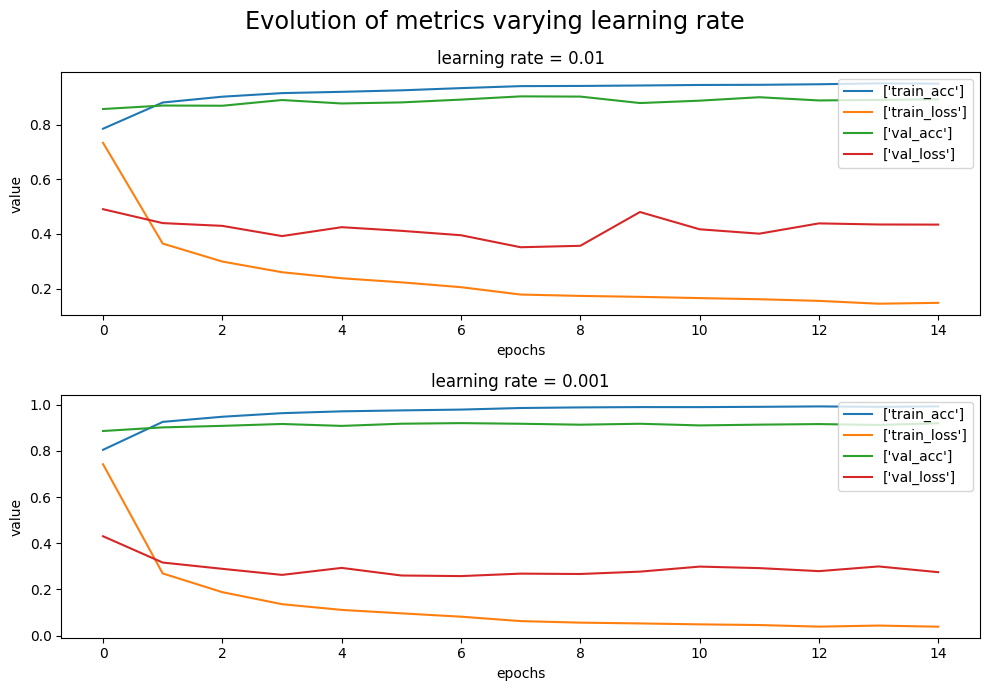

In [36]:
# Plotting the training process with the different learning rates
# Preparing the plot area
fig, axs = plt.subplots(2, figsize=(10,7))

i = 0
# loop through every value of learning rate
for val in lr:
    # looping through every metric for each value
    for metric in lr[val]:
        # plotting the data
        axs[i].plot(lr[val][metric], label=[metric])
        
    # Setting the title, labels and legend
    axs[i].set_title('learning rate = ' + str(val))
    axs[i].set_xlabel('epochs')
    axs[i].set_ylabel('value')
    axs[i].legend(loc='upper right')
    i +=1

fig.suptitle('Evolution of metrics with varying learning rate', size='xx-large')
fig.tight_layout()
plt.show()

### It is clear to see how the lower learning rate benefits the model. The accuracy of both the training and validation show similar curves and values, and even the train loss is similar, even though it is somewhat lower with the lower learning rate. The biggest difference is in the validation loss. With the larger learning rate, this curve did not converge to a value, probably because it was “hopping” through the local minimum, due to the larger step. In this experience, we concluded that 0.001 is the best learning of all compared.

### Due to time constriants in the training process, I can't run a varying dropout analysis. Therefore we will continue with the already selected dropout value of 25% which already worked fine in the previous analysis.

In [37]:
# Get an instance of the model with the learning rate and dropout value
model = getModel(learning_rate=0.001, dropout=0.25)

# Training the model with the selected parameters
model.fit(x_train, onehotencode_func(y_train), batch_size=32, epochs=15)


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 299, 299, 3)]     0         
                                                                 
 tf.math.truediv_6 (TFOpLamb  (None, 299, 299, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_6 (TFOpLam  (None, 299, 299, 3)      0         
 bda)                                                            
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                           

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/15
162/162 [==============================] - 3608s 22s/step - loss: 0.6174 - accuracy: 0.8320
Epoch 2/15
162/162 [==============================] - 3565s 22s/step - loss: 0.2474 - accuracy: 0.9271
Epoch 3/15
162/162 [==============================] - 3602s 22s/step - loss: 0.1841 - accuracy: 0.9458
Epoch 4/15
162/162 [==============================] - 3499s 22s/step - loss: 0.1542 - accuracy: 0.9559
Epoch 5/15
162/162 [==============================] - 3470s 21s/step - loss: 0.1249 - accuracy: 0.9634
Epoch 6/15
162/162 [==============================] - 3479s 21s/step - loss: 0.1059 - accuracy: 0.9688
Epoch 7/15
162/162 [==============================] - 3472s 21s/step - loss: 0.0994 - accuracy: 0.9733
Epoch 8/15
162/162 [==============================] - 3476s 21s/step - loss: 0.0814 - accuracy: 0.9799
Epoch 9/15
162/162 [==============================] - 3904s 24s/step - loss: 0.0665 - accuracy: 0.9818
Epoch 10/15
162/162 [==============================] - 3750s 23s/step - l

## Final Training accuracy score of 0.9851 is very okay

In [38]:
# Saving the model structure to a json file
model_json = model.to_json()
with open("model_structure.json", "w") as json_file:
    json_file.write(model_json)
print("Saved the model structure into a json file")

# Saving the model weights to a h5 file
print("Saved the model weights into h5 file")
model.save_weights("model_weights.h5")

Saved the model structure into a json file
Saved the model weights into h5 file


In [34]:
# Reloading the model from json and h5 files
print("Reloading the model from json and h5 files...")
json_file = open('model_structure.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("model_weights.h5")
print("Model loaded")

Reloading the model from json and h5 files...
Model loaded


In [40]:
# Predicting using the test data
y_pred = loaded_model.predict(x_test)

# Converting values in the array from one-hot encoding to decimal numbers
y_pred_id = [ np.argmax(i)+1 for i in y_pred]

70/70 [==============================] - 1658s 23s/step


### Now there are some interesting ways to visualize how good the model is predicting the images. One of them is a confusion matrix, which is a very nice way to understand the cases where the model is predicting wrong. We can show a heat map representation of this matrix with the following code.

## Creating a confusion matrix of the predicted results 

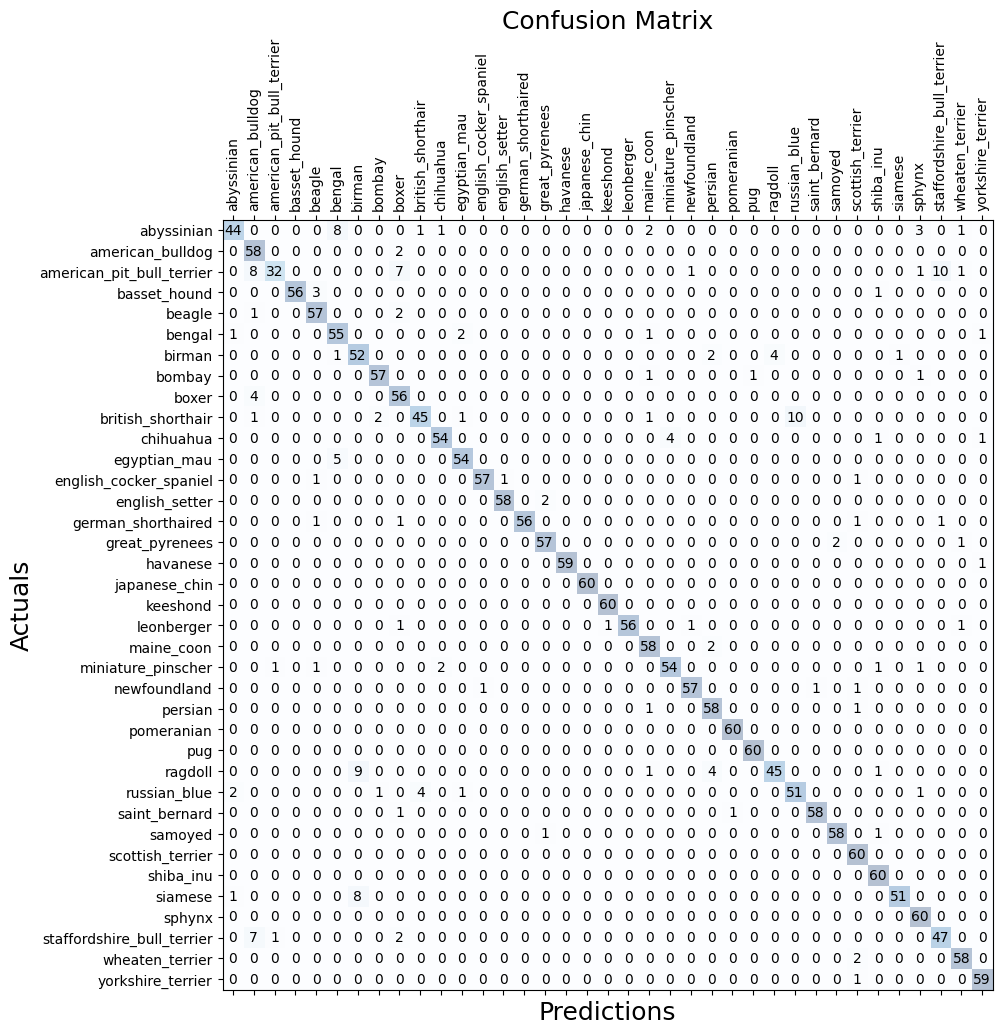

In [61]:
from sklearn.metrics import confusion_matrix

# Assigning the breed names to the labels
labels = xLabels

cm = confusion_matrix(y_true=y_test, y_pred=y_pred_id)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center')
        

# Setting up labels, ticks and title
ax.set_xticks(range(0, 37))
ax.set_yticks(range(0,37))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation='vertical')

 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Showing actual figures', fontsize=18)
plt.show()


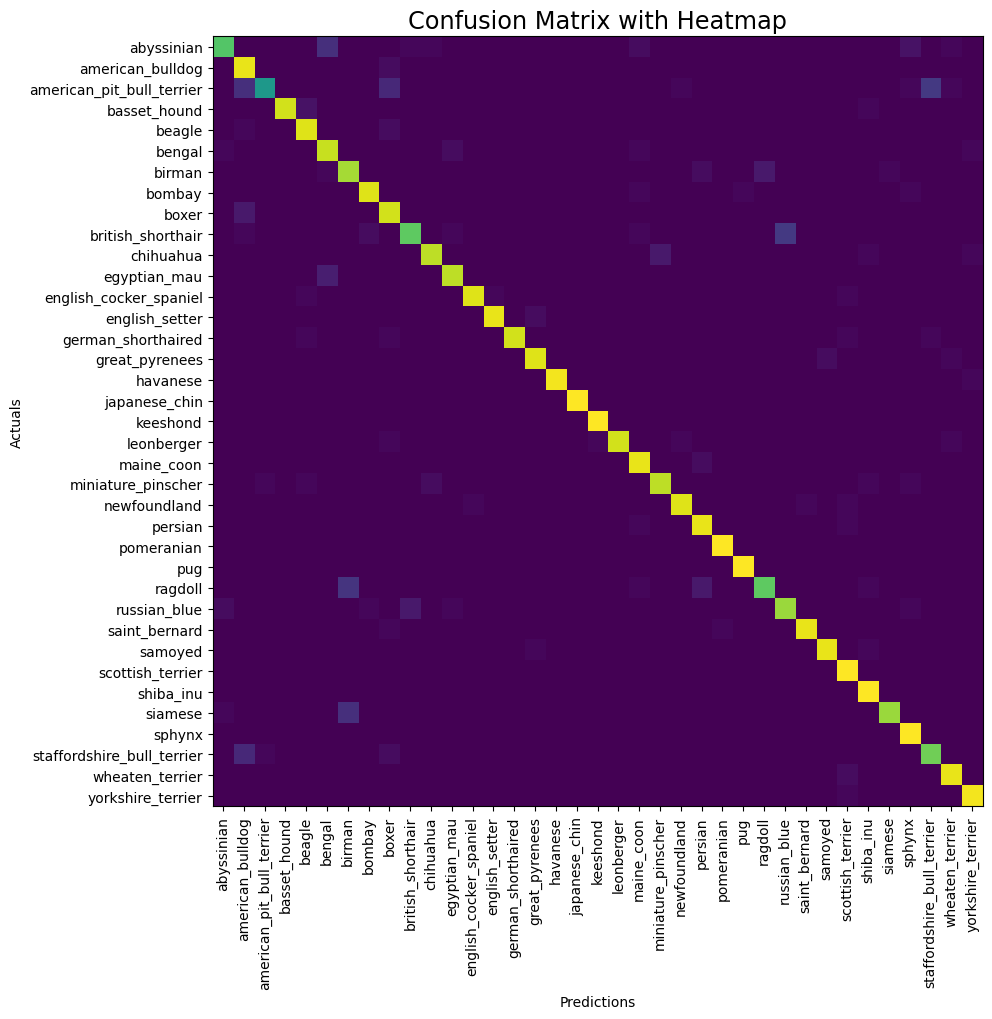

In [62]:
# Dispalying a heat map representation of Confusion matrix 
from sklearn import metrics

# Computing the matrix
cm = metrics.confusion_matrix(y_test, y_pred_id)

# Preparing the plot area
fig, ax = plt.subplots( figsize= (10, 10))

# Displaying data in form of image
ax.imshow(cm)

# Setting up labels
ax.set_xticks(range(0, 37))
ax.set_yticks(range(0,37))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation='vertical')

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix with Heatmap', size='xx-large')
plt.show()


## Model Fine-Tuning

### _In order to make the model robust and avoid over-fitting, the model needed to be improved further._
### We will start the process by unfreezing some of the last layers of the pre-trained InceptionV3 model by Fine Tuning the Base Model to improve the model performance.
Having a trained the model on the Oxford-IIIT Pet dataset, we can now unfreeze some layers of the base model. In this case, the last third of the base model’s layers was unfreezed. The model is then trained for more epochs using a very low learning rate of 0.0001.

In [63]:
# A function for displaying a table with values of precision, recall, f1-score and accuracy
metrics.classification_report(y_test, y_pred_id)

'              precision    recall  f1-score   support\n\n           1       0.92      0.73      0.81        60\n           2       0.73      0.97      0.83        60\n           3       0.94      0.53      0.68        60\n           4       1.00      0.93      0.97        60\n           5       0.90      0.95      0.93        60\n           6       0.80      0.92      0.85        60\n           7       0.75      0.87      0.81        60\n           8       0.95      0.95      0.95        60\n           9       0.78      0.93      0.85        60\n          10       0.90      0.75      0.82        60\n          11       0.95      0.90      0.92        60\n          12       0.93      0.92      0.92        59\n          13       0.98      0.95      0.97        60\n          14       0.98      0.97      0.97        60\n          15       1.00      0.93      0.97        60\n          16       0.95      0.95      0.95        60\n          17       1.00      0.98      0.99        60\n       

### Fine-tuning the model with transfer learning
Having a model already trained on our data, we are going to unfreeze the previously frozen layers

In [64]:
model = loaded_model
for l in model.layers:
    if l.name == 'inception_v3':
        base_model = l
        break

# Unfreeze the base model layers
base_model.trainable = True

# Checking how many layers are present in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  311


### We are going to freeze all the layers before one specific chosen layer (rougly at 2/3 of the layers)

In [66]:
# Fine-tune from this layer onwards
fine_tune_at = 208

# Freeze all the layers before the fine_tune_at layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

### The learning rate used in this process should be lower because the model to be trained is huge, so smaller steps are better in order for it not to overfit. We will fit data once again for more epochs

In [70]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(lr=0.0001/10),
              metrics=['accuracy'])

fine_tune_epochs = 10
total_epochs =  15 + fine_tune_epochs
model.fit(x_train, onehotencode_func(y_train), batch_size=32, epochs=total_epochs, validation_split=0.3)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/25
114/114 [==============================] - 6480s 57s/step - loss: 4.0455 - accuracy: 0.0487 - val_loss: 9.6541 - val_accuracy: 0.0400
Epoch 2/25
114/114 [==============================] - 5797s 51s/step - loss: 3.4736 - accuracy: 0.0517 - val_loss: 4.5510 - val_accuracy: 0.0554
Epoch 3/25
114/114 [==============================] - 5704s 50s/step - loss: 3.2931 - accuracy: 0.0658 - val_loss: 3.1440 - val_accuracy: 0.0787
Epoch 4/25
114/114 [==============================] - 5678s 50s/step - loss: 3.2529 - accuracy: 0.0666 - val_loss: 3.1530 - val_accuracy: 0.1077
Epoch 5/25
114/114 [==============================] - 5659s 50s/step - loss: 3.1699 - accuracy: 0.0641 - val_loss: 3.1971 - val_accuracy: 0.0535
Epoch 6/25
114/114 [==============================] - 5643s 50s/step - loss: 3.1605 - accuracy: 0.0758 - val_loss: 3.2530 - val_accuracy: 0.0787
Epoch 7/25
114/114 [==============================] - 5706s 50s/step - loss: 3.1157 - accuracy: 0.0821 - val_loss: 3.3346 - val_ac

In [72]:
# Saving model for further training
model.save('./FreezeModel_tf',save_format='tf')


INFO:tensorflow:Assets written to: ./FreezeModel_tf\assets


INFO:tensorflow:Assets written to: ./FreezeModel_tf\assets


In [74]:
# Loading the saved model
loaded_model1 = tf.keras.models.load_model('./FreezeModel_tf')

In [75]:
# Retraining the model
model = loaded_model1
model.fit(x_train, onehotencode_func(y_train), batch_size=32, epochs=5, validation_split=0.3)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/5
114/114 [==============================] - 19147s 168s/step - loss: 1.4893 - accuracy: 0.4797 - val_loss: 1.8476 - val_accuracy: 0.3772
Epoch 2/5
114/114 [==============================] - 18810s 165s/step - loss: 1.3181 - accuracy: 0.5209 - val_loss: 606.5067 - val_accuracy: 0.3585
Epoch 3/5
114/114 [==============================] - 18074s 159s/step - loss: 1.1891 - accuracy: 0.5720 - val_loss: 1.5569 - val_accuracy: 0.4861
Epoch 4/5
114/114 [==============================] - 17642s 155s/step - loss: 1.0452 - accuracy: 0.6284 - val_loss: 297.6017 - val_accuracy: 0.5525
Epoch 5/5
114/114 [==============================] - 18025s 158s/step - loss: 0.9372 - accuracy: 0.6641 - val_loss: 1.7219 - val_accuracy: 0.5358


In [76]:
# Saving model for further training
model.save('./FreezeModel_tf02',save_format='tf')

INFO:tensorflow:Assets written to: ./FreezeModel_tf02\assets


INFO:tensorflow:Assets written to: ./FreezeModel_tf02\assets


In [2]:
# Loading the saved model
loaded_model2 = tf.keras.models.load_model('./FreezeModel_tf02')

In [16]:
# Retraining the model
model = loaded_model2
model.fit(x_train, onehotencode_func(y_train), batch_size=32, epochs=5, validation_split=0.3)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/5
114/114 [==============================] - 4675s 41s/step - loss: 1.1960 - accuracy: 0.5983 - val_loss: 1.2127 - val_accuracy: 0.5996
Epoch 2/5
114/114 [==============================] - 4459s 39s/step - loss: 0.9981 - accuracy: 0.6417 - val_loss: 1.3921 - val_accuracy: 0.5390
Epoch 3/5
114/114 [==============================] - 4465s 39s/step - loss: 0.8630 - accuracy: 0.6942 - val_loss: 1.1418 - val_accuracy: 0.6286
Epoch 4/5
114/114 [==============================] - 4467s 39s/step - loss: 0.7715 - accuracy: 0.7191 - val_loss: 1.7958 - val_accuracy: 0.4417
Epoch 5/5
114/114 [==============================] - 4444s 39s/step - loss: 0.6868 - accuracy: 0.7426 - val_loss: 43017.0547 - val_accuracy: 0.6144


In [17]:
# Saving model for further training
model.save('./FreezeModel_tf03',save_format='tf')

INFO:tensorflow:Assets written to: ./FreezeModel_tf03\assets


INFO:tensorflow:Assets written to: ./FreezeModel_tf03\assets


In [18]:
# loading the saved model
loaded_model3 = tf.keras.models.load_model('./FreezeModel_tf03')

In [19]:
# Retraining the model
model = loaded_model3
model.fit(x_train, onehotencode_func(y_train), batch_size=32, epochs=5, validation_split=0.3)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/5
114/114 [==============================] - 7370s 65s/step - loss: 0.6687 - accuracy: 0.7581 - val_loss: 7851.3154 - val_accuracy: 0.6144
Epoch 2/5
114/114 [==============================] - 7463s 66s/step - loss: 0.5495 - accuracy: 0.7940 - val_loss: 245730.1250 - val_accuracy: 0.4674
Epoch 3/5
114/114 [==============================] - 7109s 63s/step - loss: 0.5254 - accuracy: 0.8012 - val_loss: 5417.5044 - val_accuracy: 0.6796
Epoch 4/5
114/114 [==============================] - 7041s 62s/step - loss: 0.4524 - accuracy: 0.8250 - val_loss: 5480.6646 - val_accuracy: 0.7150
Epoch 5/5
114/114 [==============================] - 7189s 63s/step - loss: 0.4374 - accuracy: 0.8341 - val_loss: 5709.7002 - val_accuracy: 0.0290


In [20]:
# Saving model for further training
model.save('./FreezeModel_tf04',save_format='tf')

INFO:tensorflow:Assets written to: ./FreezeModel_tf04\assets


INFO:tensorflow:Assets written to: ./FreezeModel_tf04\assets


In [21]:
# loading the saved model
loaded_model4 = tf.keras.models.load_model('./FreezeModel_tf04')

In [22]:
# Retraining the model
model = loaded_model4
model.fit(x_train, onehotencode_func(y_train), batch_size=32, epochs=10, validation_split=0.3)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
114/114 [==============================] - 11667s 102s/step - loss: 0.4377 - accuracy: 0.8278 - val_loss: 1.3116 - val_accuracy: 0.7163
Epoch 2/10
114/114 [==============================] - 11759s 103s/step - loss: 0.3729 - accuracy: 0.8587 - val_loss: 0.8312 - val_accuracy: 0.7621
Epoch 3/10
114/114 [==============================] - 11785s 103s/step - loss: 0.3301 - accuracy: 0.8761 - val_loss: 1.6758 - val_accuracy: 0.7421
Epoch 4/10
114/114 [==============================] - 11493s 101s/step - loss: 0.3015 - accuracy: 0.8880 - val_loss: 13.4186 - val_accuracy: 0.7344
Epoch 5/10
114/114 [==============================] - 11593s 102s/step - loss: 0.2756 - accuracy: 0.8983 - val_loss: 668447.7500 - val_accuracy: 0.7466
Epoch 6/10
114/114 [==============================] - 11544s 101s/step - loss: 0.2666 - accuracy: 0.9082 - val_loss: 1.2089 - val_accuracy: 0.7789
Epoch 7/10
114/114 [==============================] - 11838s 104s/step - loss: 0.2533 - accuracy: 0.9124 - val_l

In [23]:
# Saving model for further training
model.save('./FreezeModel_tf05',save_format='tf')

INFO:tensorflow:Assets written to: ./FreezeModel_tf05\assets


INFO:tensorflow:Assets written to: ./FreezeModel_tf05\assets


In [24]:
# Loading the saved model
loaded_model5 = tf.keras.models.load_model('./FreezeModel_tf05')

In [26]:
#Using a callbacks  to stop training when the val_accuracy is not improving
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the callbacks for the model checkpoint and early stopping
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_best_only=True, save_weights_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)

# Retraining the model
model = loaded_model5
model.fit(x_train, onehotencode_func(y_train), batch_size=32, epochs=15, callbacks=[checkpoint, earlystop], validation_split=0.3)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/15
114/114 [==============================] - 17041s 150s/step - loss: 0.1816 - accuracy: 0.9397 - val_loss: 1.4000 - val_accuracy: 0.7685
Epoch 2/15
114/114 [==============================] - 18489s 163s/step - loss: 0.1799 - accuracy: 0.9453 - val_loss: 8914.6641 - val_accuracy: 0.7705
Epoch 3/15
114/114 [==============================] - 18221s 160s/step - loss: 0.1564 - accuracy: 0.9558 - val_loss: 2.5241 - val_accuracy: 0.7627
Epoch 4/15
114/114 [==============================] - 17902s 157s/step - loss: 0.1420 - accuracy: 0.9558 - val_loss: 234365.1094 - val_accuracy: 0.7847
Epoch 5/15
114/114 [==============================] - 18429s 162s/step - loss: 0.1273 - accuracy: 0.9627 - val_loss: 161213.4062 - val_accuracy: 0.7421
Epoch 6/15
114/114 [==============================] - 19446s 171s/step - loss: 0.1396 - accuracy: 0.9588 - val_loss: 1.1158 - val_accuracy: 0.7440
Epoch 7/15
114/114 [==============================] - 18187s 160s/step - loss: 0.1017 - accuracy: 0.9674 

In [27]:
# Saving model
model.save('./FreezeModel_tf06',save_format='tf')

INFO:tensorflow:Assets written to: ./FreezeModel_tf06\assets


INFO:tensorflow:Assets written to: ./FreezeModel_tf06\assets


In [17]:
# loading the saved model
loaded_model6 = tf.keras.models.load_model('./FreezeModel_tf06')

In [24]:
# Using Loaded_model6 to make predictions
model = loaded_model6

# Predict using the test data
y_pred2 = model.predict(x_test)

# convert values in the array from one-hot encoding to decimal numbers
y_pred_id2 = [ np.argmax(i)+1 for i in y_pred2]

70/70 [==============================] - 1365s 19s/step


## Creating a confusion matrix of the predicted results 

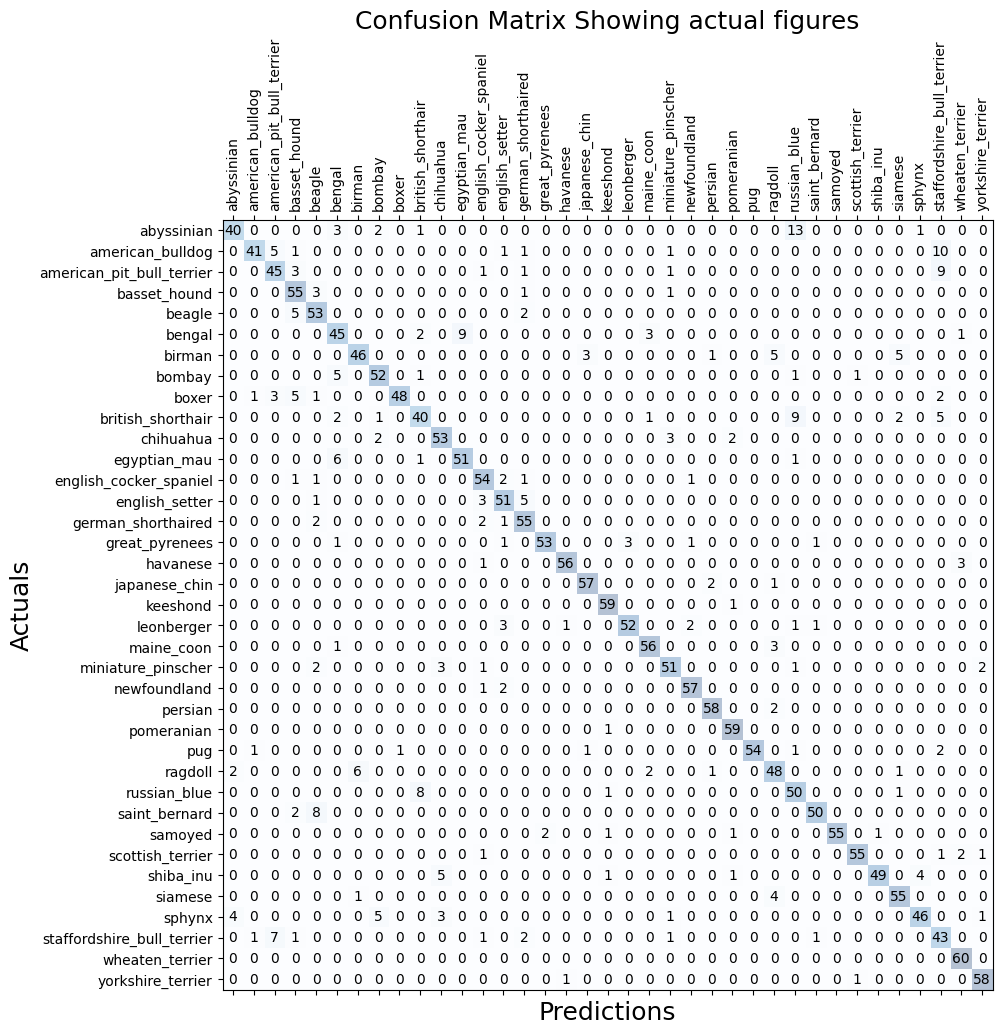

In [27]:
from sklearn.metrics import confusion_matrix

# Assigning the breed names to the labels
labels = xLabels

cm = confusion_matrix(y_true=y_test, y_pred=y_pred_id2)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center')
        

# Setting up labels, ticks and title
ax.set_xticks(range(0, 37))
ax.set_yticks(range(0,37))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation='vertical')

 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Showing actual figures', fontsize=18)
plt.show()


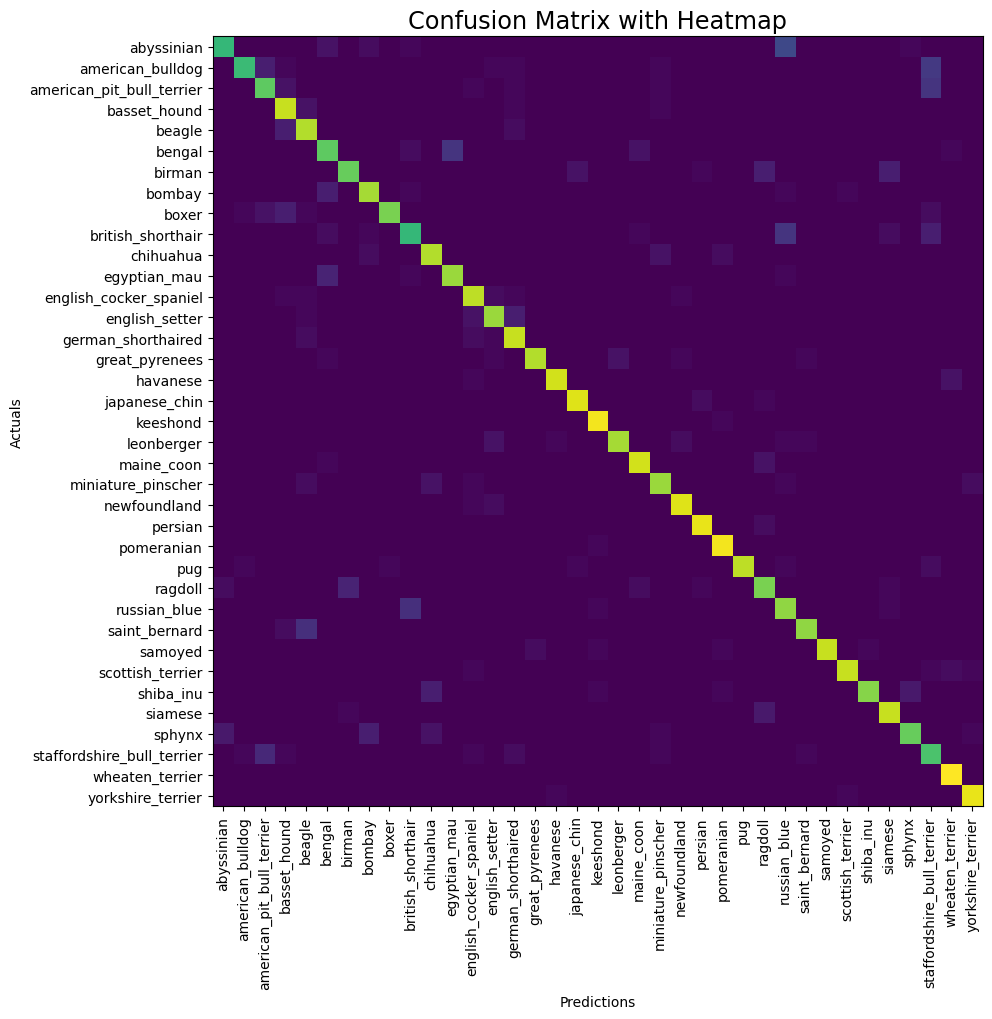

In [28]:
from sklearn import metrics

# Computing the matrix
cm = metrics.confusion_matrix(y_test, y_pred_id2)

# Preparing the plot area
fig, ax = plt.subplots( figsize= (10, 10))

# Displaying the data in form of an image
ax.imshow(cm)

# setup for labels, ticks and title
ax.set_xticks(range(0, 37))
ax.set_yticks(range(0,37))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation='vertical')

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix with Heatmap', size='xx-large')
plt.show()


In [94]:
# Testing the model with an image of a pet
ImgPath = 'Oxford_dataset/Test_image/pug_30.jpg'
imgPath_array = cv2.imread(ImgPath)[...,::-1]          

# Resizing the image
imgPath_array = cv2.resize(imgPath_array, (IMG_SIZE, IMG_SIZE))

In [95]:
# Reshaping the data
test_data = np.array(imgPath_array).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [96]:
# Using Loaded_model6 to make predictions
model = loaded_model6

In [97]:
# Predict using the test image
image_pred2 = model.predict(test_data)

# Convert values in the array from one-hot encoding to decimal numbers
image_pred_id2 = [ np.argmax(i)+1 for i in image_pred2]
image_pred_id2

1/1 [==============================] - 2s 2s/step


[26]

In [98]:
# Get the class of the predicted label
print(f'The breed of the pet is {xLabels[image_pred_id2[0]-1].title()}')


The breed of the pet is Pug


In [25]:
xLabels

['abyssinian',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'bengal',
 'birman',
 'bombay',
 'boxer',
 'british_shorthair',
 'chihuahua',
 'egyptian_mau',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'maine_coon',
 'miniature_pinscher',
 'newfoundland',
 'persian',
 'pomeranian',
 'pug',
 'ragdoll',
 'russian_blue',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'siamese',
 'sphynx',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']